Варіант 5)

\begin{cases}8.1 * x_{1} + 8.5 * x_{2} = 72\\–3.2 * x_{1} + 15.2 * x_{2} = 42\\ 10.2 * x_{1}+ 8.8 * x_{2} = 205\end{cases}

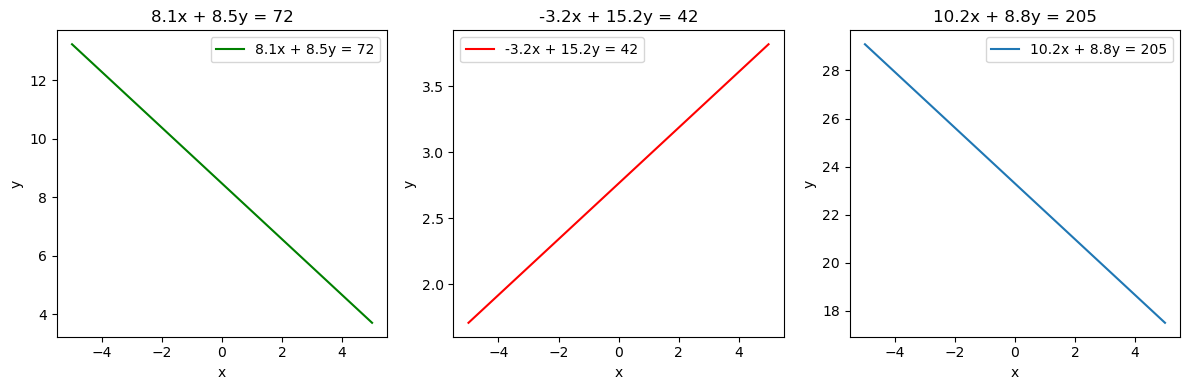

In [133]:
import matplotlib.pyplot as plt

eq1 = "8.1x + 8.5y = 72"
eq2 = "-3.2x + 15.2y = 42"
eq3 = "10.2x + 8.8y = 205"

x = range(-5, 6)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.plot(x, [(72 - 8.1*i)/8.5 for i in x], label=eq1, color = 'g')
ax2.plot(x, [(42 + 3.2 * i)/15.2 for i in x], label=eq2, color = 'r')
ax3.plot(x, [(205 - 10.2*i)/8.8 for i in x], label=eq3)

ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title(eq1)
ax1.legend()

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title(eq2)
ax2.legend()

ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_title(eq3)
ax3.legend()

plt.tight_layout()
plt.show()

[8.1 8.5] [72.]
[ 5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22.
 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40.
 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58.
 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.]


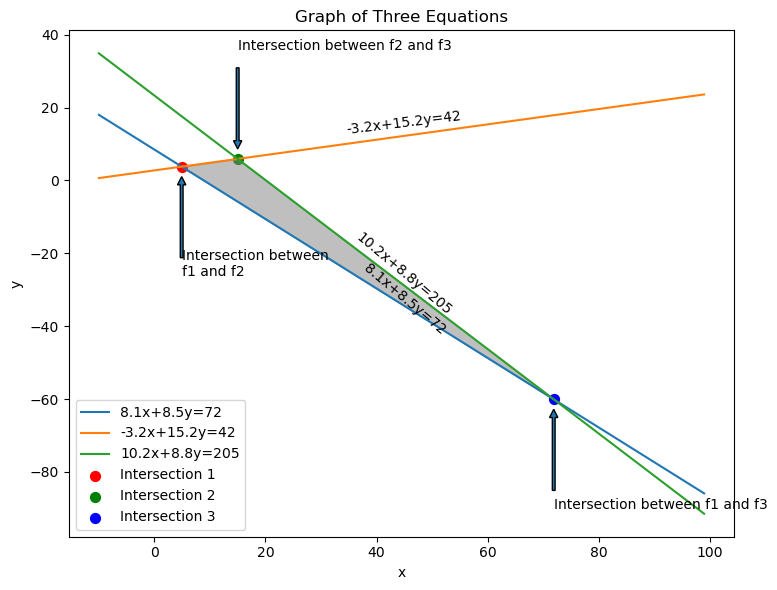

In [134]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
import numpy as np

# Define your equations here
eq1 = "8.1x+8.5y=72"
eq2 = "-3.2x+15.2y=42"
eq3 = "10.2x+8.8y=205"

# Function to convert equation string to linear form
def str_to_linear(eq):
    rest, result = eq.split("=")
    x, rest = rest.split("x")
    x = float(x)
    y = float(rest.split('y')[0])
    result = float(result.strip())
    return np.array([x, y]), np.array([result])

# Convert equations to linear form
A1, b1 = str_to_linear(eq1)
print(A1, b1)
A2, b2 = str_to_linear(eq2)
A3, b3 = str_to_linear(eq3)

# Find intersection points using numpy.linalg.solve
intersection1 = np.linalg.solve(np.vstack([A1, A2]), np.vstack([b1, b2]))
intersection2 = np.linalg.solve(np.vstack([A2, A3]), np.vstack([b2, b3]))
intersection3 = np.linalg.solve(np.vstack([A1, A3]), np.vstack([b1, b3]))

# Define x values for plotting
x = range(-10, 100)

# Create the plot
plt.figure(figsize=(8, 6))

middle_x = x[int(len(x)/2)]
 
# Plot lines and label them
y1_values = [(72 - 8.1*i)/8.5 for i in x]
middle_y = y1_values[int(len(y_values)/2)]
plt.plot(x, y1_values, label=eq1)
plt.text(middle_x, middle_y - 8, eq1, ha="center", rotation = -40)

y2_values = [(42 + 3.2 * i)/15.2 for i in x]
middle_y = y2_values[int(len(y_values)/2)]
plt.plot(x, y2_values, label=eq2)
plt.text(middle_x, middle_y + 0.5, eq2, ha="center", rotation = 7)

y3_values = [(205 - 10.2*i)/8.8 for i in x]
middle_y = y3_values[int(len(y_values)/2)]
plt.plot(x, y3_values, label=eq3)
plt.text(middle_x, middle_y - 8, eq3, ha="center", rotation = -40)

# Mark intersection points
plt.scatter(intersection1[0], intersection1[1], s=50, c='red', label='Intersection 1')
plt.scatter(intersection2[0], intersection2[1], s=50, c='green', label='Intersection 2')
plt.scatter(intersection3[0], intersection3[1], s=50, c='blue', label='Intersection 3')

z = np.dstack((x, y1_values, y2_values, y3_values))
z = z.reshape(len(x), 4)

z = [row for row in z if row[0] >= intersection1[0][0]]
z = [row for row in z if row[0] <= intersection3[0][0]]
z = np.array(z)

res = np.split(z, 4, 1)
x = res[0].flatten()
print(x)

y1_values = res[1].flatten()
y2_values = res[2].flatten()
y3_values = res[3].flatten()

y4_values = np.minimum(y2_values, y3_values)

plt.fill_between(x, y1_values, y4_values, color='grey', alpha=0.5)

plt.arrow(intersection1[0][0], intersection1[1][0] -25, 0, 20, width = 0.5)
plt.annotate('Intersection between\nf1 and f2', (intersection1[0][0], intersection1[1][0] -30))

plt.arrow(intersection2[0][0], intersection2[1][0] + 25, 0, -20, width = 0.5)
plt.annotate('Intersection between f2 and f3', (intersection2[0][0], intersection2[1][0] + 30))

plt.arrow(intersection3[0][0], intersection3[1][0] -25, 0, 20, width = 0.5)
plt.annotate('Intersection between f1 and f3', (intersection3[0][0], intersection3[1][0] -30))


# Add labels, title, and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of Three Equations")
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()